<a href="https://colab.research.google.com/github/JoseCamargo10/machinelearning-project/blob/main/Entrega%202/ProyectoML_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Predicción del Rendimiento en Matemáticas de Estudiantes mediante Aprendizaje de Máquina



## 👤 Integrantes

- José Manuel Camargo Hoyos
- John Alexander Acevedo Serna
- Santiago Rodríguez Duque
___

## 📋 Tabla de Contenidos

1. **Objetivo General**
2. **Objetivos Específicos**
3. **Entrega 1**
    - Comprensión del Negocio
    - Obtención y Comprensión de Datos
    - Variables
    - Baseline
4. **Entrega 2**
    - Preparación de los datos
___    





## 🏷️ Objetivo General

Desarrollar un modelo de machine learning que permita predecir si un estudiante aprobará el examen de matemáticas a partir de variables demográficas y académicas (género, nivel educativo de los padres, tipo de almuerzo, preparación previa, entre otras), con el fin de identificar tempranamente a estudiantes en riesgo académico y apoyar la toma de decisiones en intervenciones educativas.
___

## 🎯 Objetivos Específicos

- Analizar y caracterizar el conjunto de datos *Students Performance in Exams*, identificando la calidad de la información, variables relevantes y posibles sesgos.
- Definir y preparar la variable objeto *pass_math*, que indica si un estudiante aprueba o no matemáticas.
- Realizar un análisis exploratorio de datos (EDA) que permita entender patrones, correlaciones y factores asociados al desempeño.
- Construir un modelo baseline que sirva como punto de referencia inicial.
- Establecer métricas de evaluación adecuadas para clasificación binaria, considerando posibles desbalances de clases.
___

# 1️⃣ Entrega 1

### 💼 Comprensión del Negocio

El rendimiento en matemáticas es un indicador clave del desempeño académico y puede afectar el futuro educativo y laboral de los estudiantes. Instituciones educativas necesitan herramientas para detectar tempranamente a quienes podrían reprobar, de modo que puedan ofrecer apoyo adicional y reducir la deserción o el bajo rendimiento.

En la actualidad, los docentes o coordinadores identifican estudiantes en riesgo principalmente con base en observación subjetiva o [análisis tardío de calificaciones](https://www.rededuca.net/contexto-educativo/d/desempe%C3%B1o-academico#:~:text=De%20forma%20general%20en%20el,parciales%20o%20calificaciones%20de%20tareas.). Esto puede llevar a intervenciones poco oportunas o ineficaces en el proceso y formación académica de los estudiantes.

A través de este proyecto se quiere implementar aprendizaje automático para predecir si un estudiante aprobará matemáticas a partir de información disponible antes o al inicio del curso (demografía, preparación previa, tipo de almuerzo, nivel educativo de los padres...). Con un modelo predictivo se podrían priorizar recursos, tutorías y acompañamiento a quienes más lo necesitan.

#### 📐 KPIs
- **Métrica del Negocio:** Aumentar la Tasa de Aprobación de Matemáticas **(Score ≥60)** del nivel actual a la meta de **≥80%**.
- **Métrica Técnica:** **Recall** ≥0.85 **(85%)**. El modelo debe ser capaz de identificar acertadamente por lo menos un 85% de los estudiantes que suspenderán

#### 🚗 Viabilidad
- **¿Hay datos suficientes y de calidad?** El dataset cuenta con 1000 registros y variables relevantes sin valores nulos significativos, lo que permite entrenar modelos básicos de clasificación.
- **¿Realmente se necesita Machine Learning?** Si se utilizaran reglas simples (por ejemplo, umbrales fijos en calificaciones previas), serían muy limitadas porque no consideran relaciones entre variables (por ejemplo, que la educación de los padres y la preparación influyan en la nota final). Usando Machine Learning se pueden capturar dichas interacciones y mejoraría la precisión.
- **¿Existe capacidad técnica para mantener la solución?** El modelo puede desarrollarse y mantenerse usando Python, scikit-learn y Jupyter, tecnologías accesibles para un equipo académico con conocimientos básicos en ciencia de datos.

### 📊 Obtención y Comprensión de Datos

**Origen del Dataset "*Students Performance in Exams*":** Notas obtenidas por estudiantes en varias asignaturas Estos datos se basan en la demografía de la población. Los datos contienen varias características como el tipo de comida que se le da al estudiante, el nivel de preparación para el examen, el nivel de educación de los padres y el rendimiento de los estudiantes en Matemáticas, Lectura y Escritura.

**Librerías a Utilizar**

- **NumPy:** El motor matemático de Python. Maneja arrays y operaciones numéricas eficientemente
- **Pandas:** Como Excel con superpoderes. Organiza datos en DataFrames (tablas)
- **Matplotlib/Seaborn:** Nuestros artistas. Crean visualizaciones profesionales
- **Scikit-learn:** La navaja suiza del ML. Contiene algoritmos, métricas y utilidades

In [1]:
# Configuración inicial del entorno
import sys
import warnings
warnings.filterwarnings('ignore')

print(f"✅ Python {sys.version_info.major}.{sys.version_info.minor} instalado correctamente")

✅ Python 3.12 instalado correctamente


In [64]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from pathlib import Path
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, classification_report,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay
)

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


**Carga de Datos al Notebook**

In [3]:
RAW_URL = "https://raw.githubusercontent.com/JoseCamargo10/machinelearning-project/main/data/StudentsPerformance.csv"

def load_data():
    data_path = Path("datasets")
    data_path.mkdir(parents=True, exist_ok=True)
    csv_path = data_path / "StudentsPerformance.csv"

    # Si existe pero es inválido (p.ej. HTML guardado), forzamos redescarga
    def looks_like_html(p: Path) -> bool:
        try:
            head = p.read_text(encoding="utf-8", errors="ignore")[:200]
            return "<!DOCTYPE html>" in head or "<html" in head.lower()
        except Exception:
            return False

    if csv_path.is_file() and csv_path.stat().st_size > 0 and not looks_like_html(csv_path):
        print("📁 Cargando datos desde caché local…")
        return pd.read_csv(csv_path)
    else:
        print("📥 Descargando dataset…")
        urllib.request.urlretrieve(RAW_URL, csv_path)
        print("✅ Descarga completada")
        return pd.read_csv(csv_path)

df = load_data()
print(f"\n📊 Dataset cargado: {df.shape[0]:,} filas × {df.shape[1]} columnas")

📥 Descargando dataset…
✅ Descarga completada

📊 Dataset cargado: 1,000 filas × 8 columnas


#### 🔎 Análisis Exploratorio de Datos

**Primera inspección de datos**

In [4]:
# Vista general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET".center(80))
print("=" * 80)

# Mostrar primeras filas con mapa de calor de la media en notas
display(df.head().style.background_gradient(cmap='coolwarm'))

# Información detallada
print("\n" + "=" * 80)
print("ESTRUCTURA DE DATOS".center(80))
print("=" * 80)
df.info()

# Estadísticas descriptivas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS".center(80))
print("=" * 80)
display(df.describe().round(2).T)

                        INFORMACIÓN GENERAL DEL DATASET                         


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75



                              ESTRUCTURA DE DATOS                               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB

                           ESTADÍSTICAS DESCRIPTIVAS                            


,count,mean,std,min,25%,50%,75%,max
math score,1000.00,66.09,15.16,0.00,57.00,66.00,77.00,100.00
reading score,1000.00,69.17,14.60,17.00,59.00,70.00,79.00,100.00
writing score,1000.00,68.05,15.20,10.00,57.75,69.00,79.00,100.00


### 😥 Problema

Con el fin de comrpobar la existencia del problema y que se pueda cumplir con los objetivos de al solución, debeos verificar cual es la tasa de aprobación de matemáticas actual

In [5]:
APROBACION_SCORE = 60
df['aprobado_matematicas'] = df['math score'] >= APROBACION_SCORE
tasa_aprobacion = df['aprobado_matematicas'].mean() * 100

print("--- Tasa de Aprobación Actual de Matemáticas ---")
print(f"El umbral de aprobación utilizado es: {APROBACION_SCORE} puntos.")
print(f"La Tasa de Aprobación Actual es: {tasa_aprobacion:.2f}%")
print("------------------------------------------------")

--- Tasa de Aprobación Actual de Matemáticas ---
El umbral de aprobación utilizado es: 60 puntos.
La Tasa de Aprobación Actual es: 67.70%
------------------------------------------------


## 🔢 Variables

### Análisis del Dataset

Todas las columnas presentan datos completos por lo que no hay ningún problema

### Descripción de las variables

**Variables demográficas**:
- `gender`: Género de cada estudiante
- `race/ethnicity`: Grupo étnico al que pertenece cada estudiante

**Variables socioeconómicas/demográficas**:
- `parental level of education`: Nivel de educación máximo alcanzado por los padres del estudiante **(ordinal)**
- `lunch`: Comida a la que tiene acceso el estudiante, dieta estándar o reducida

**Variable comportamental académica**:
- `test preparation course`: Representa si el estudiante completó el curso de preparación o no

## 📈 Identificación de relaciones y distribución de los datos

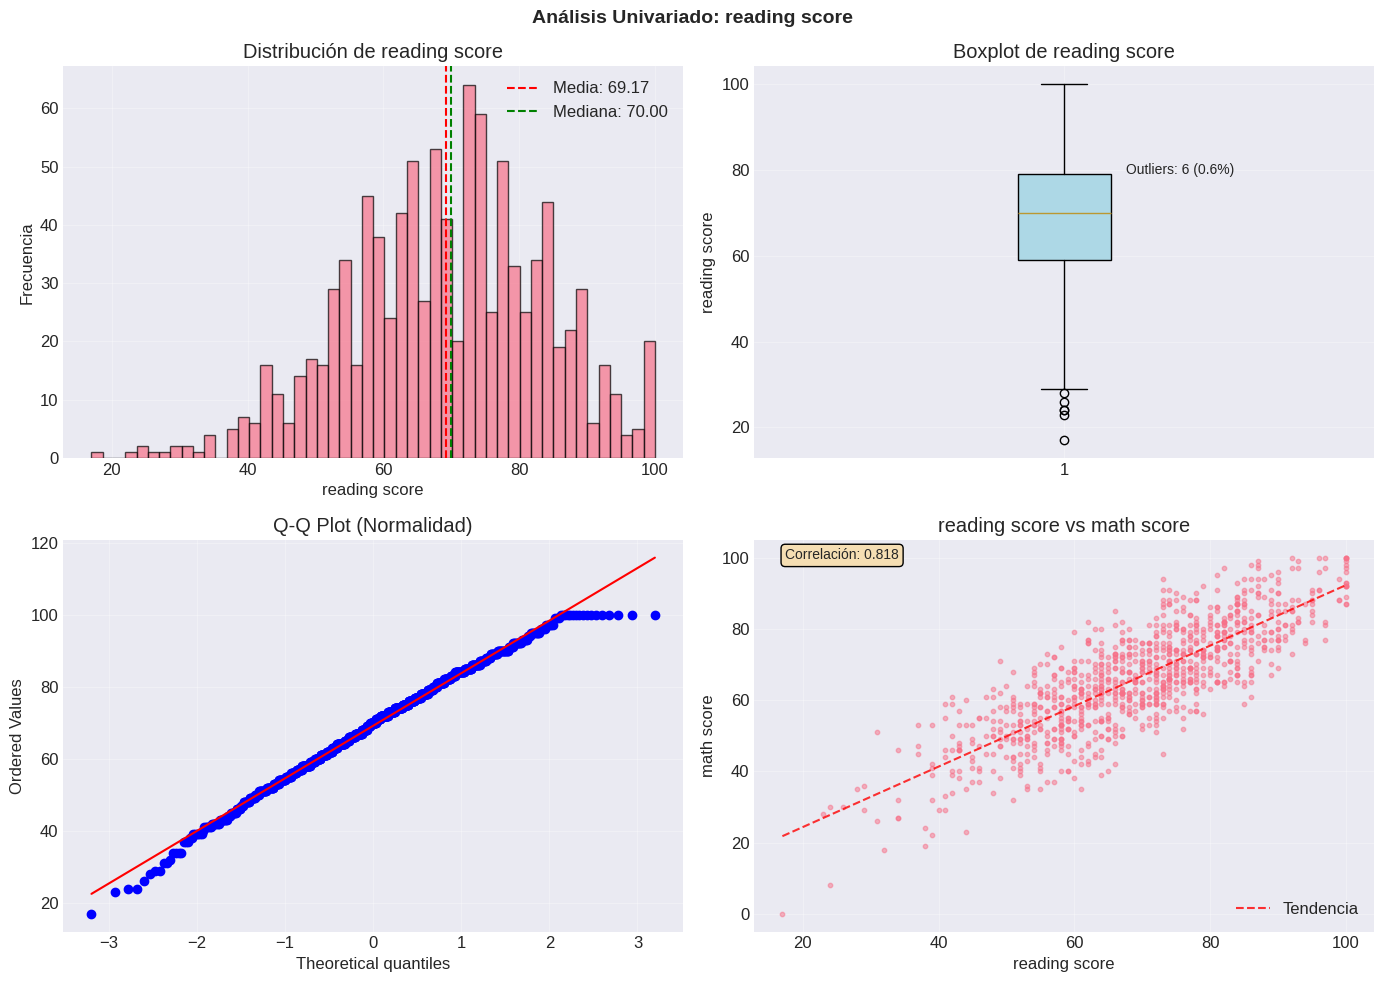

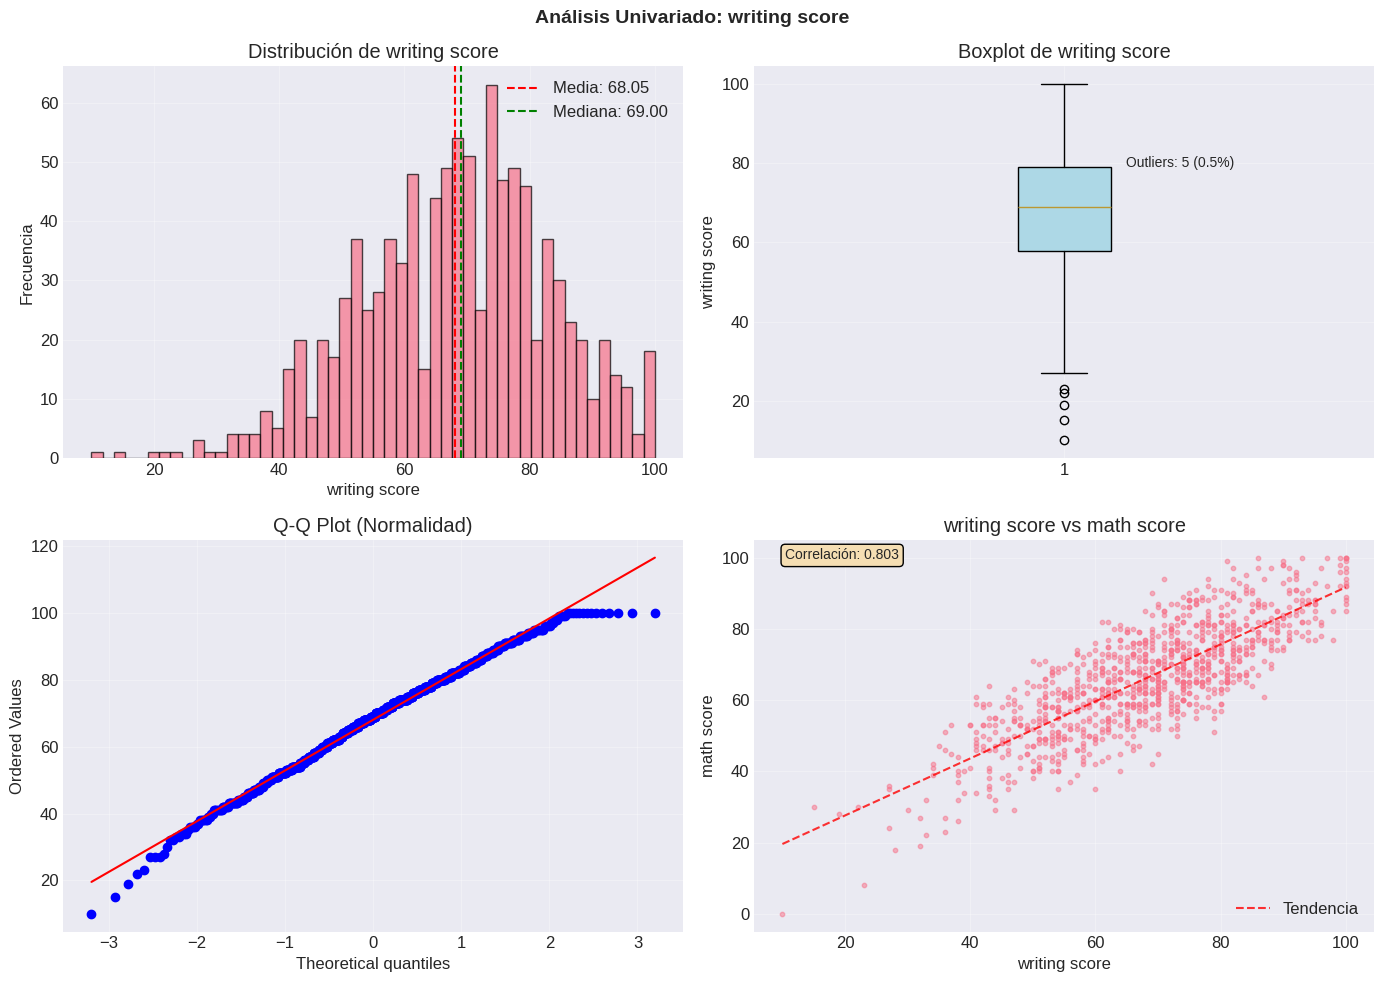

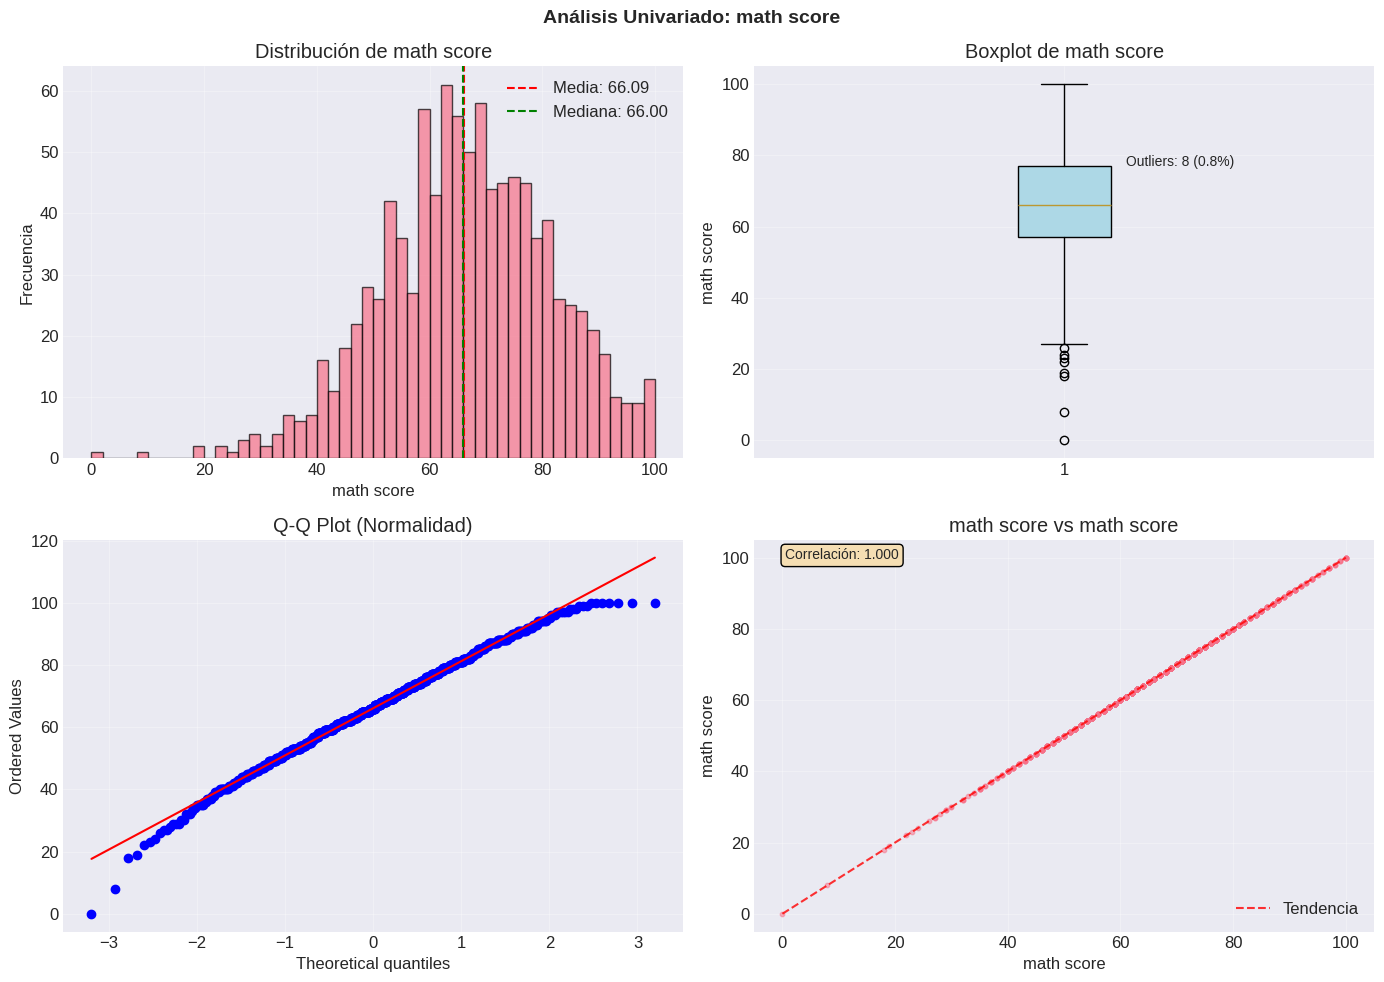

In [6]:
# Función para análisis univariado robusto
def univariate_analysis(df, column, target=None):
    """Análisis univariado con estadísticas robustas"""

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Histograma con KDE
    ax1 = axes[0, 0]
    df[column].hist(bins=50, edgecolor='black', alpha=0.7, ax=ax1)
    ax1.axvline(df[column].mean(), color='red', linestyle='--', label=f'Media: {df[column].mean():.2f}')
    ax1.axvline(df[column].median(), color='green', linestyle='--', label=f'Mediana: {df[column].median():.2f}')
    ax1.set_title(f'Distribución de {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frecuencia')
    ax1.legend()
    ax1.grid(alpha=0.3)

    # 2. Boxplot
    ax2 = axes[0, 1]
    bp = ax2.boxplot(df[column].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax2.set_title(f'Boxplot de {column}')
    ax2.set_ylabel(column)
    ax2.grid(alpha=0.3)

    # Detectar outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    ax2.text(1.1, Q3, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
             fontsize=10)

    # 3. Q-Q Plot
    ax3 = axes[1, 0]
    from scipy import stats
    stats.probplot(df[column].dropna(), dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot (Normalidad)')
    ax3.grid(alpha=0.3)

    # 4. Relación con target (si existe)
    ax4 = axes[1, 1]
    if target is not None and target in df.columns:
        ax4.scatter(df[column], df[target], alpha=0.5, s=10)
        ax4.set_xlabel(column)
        ax4.set_ylabel(target)
        ax4.set_title(f'{column} vs {target}')

        # Agregar línea de tendencia
        z = np.polyfit(df[column].dropna(), df[target][df[column].notna()], 1)
        p = np.poly1d(z)
        ax4.plot(df[column].sort_values(), p(df[column].sort_values()),
                "r--", alpha=0.8, label=f'Tendencia')

        # Calcular correlación
        corr = df[column].corr(df[target])
        ax4.text(0.05, 0.95, f'Correlación: {corr:.3f}',
                transform=ax4.transAxes, fontsize=10,
                bbox=dict(boxstyle='round', facecolor='wheat'))
        ax4.legend()
    else:
        # Estadísticas adicionales
        ax4.axis('off')
        stats_text = f"""
        Estadísticas Robustas:

        • Media: {df[column].mean():.2f}
        • Mediana: {df[column].median():.2f}
        • Desv. Estándar: {df[column].std():.2f}
        • MAD: {stats.median_abs_deviation(df[column].dropna()):.2f}
        • Asimetría: {df[column].skew():.2f}
        • Curtosis: {df[column].kurtosis():.2f}
        • Rango: [{df[column].min():.2f}, {df[column].max():.2f}]
        • IQR: {IQR:.2f}
        • CV: {df[column].std()/df[column].mean():.2f}
        """
        ax4.text(0.1, 0.5, stats_text, transform=ax4.transAxes,
                fontsize=11, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

    ax4.grid(alpha=0.3)

    plt.suptitle(f'Análisis Univariado: {column}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Analizar variables numéricas clave
for col in ['reading score', 'writing score', 'math score']:
    univariate_analysis(df, col, 'math score')

### ✏ Obervaciones generales

Para matemáticas se observa que es una distribución casi uniforme donde la media y la mediana tienen prácticamente el mismo valor, y con una presencia de outliers muy baja que tienden a notas bajas. Este patrón también está presente para las demás materias.

### Relación entre variables

A primera vista parece que hay una correlación entre el resultado de matemáticas con los resultados de las otras competencias pues presenta una correlación del `0.8`.

**Problema de Representatividad (Multicolinealidad):** Este alto nivel de correlación indica un problema de Multicolinealidad. En el contexto de nuestro objetivo de predecir el fracaso en matemáticas, esta relación **no es representativa de la causa**, sino del **efecto** (la habilidad académica general), pues nos hace ver que por lo general el resultado que se obtiene en matemáticas es muy similar al que obtienen en las otras dos.




Por el contrario si comparamos las otras 2 pruebas, vemos que en estas si hay una **relación muy estrecha** (`0.95`) entre los resultados, que tiene sentido ya que si alguien tiene habilidades en lectura es muy común que también tenga esas mismas habilidades en escritura

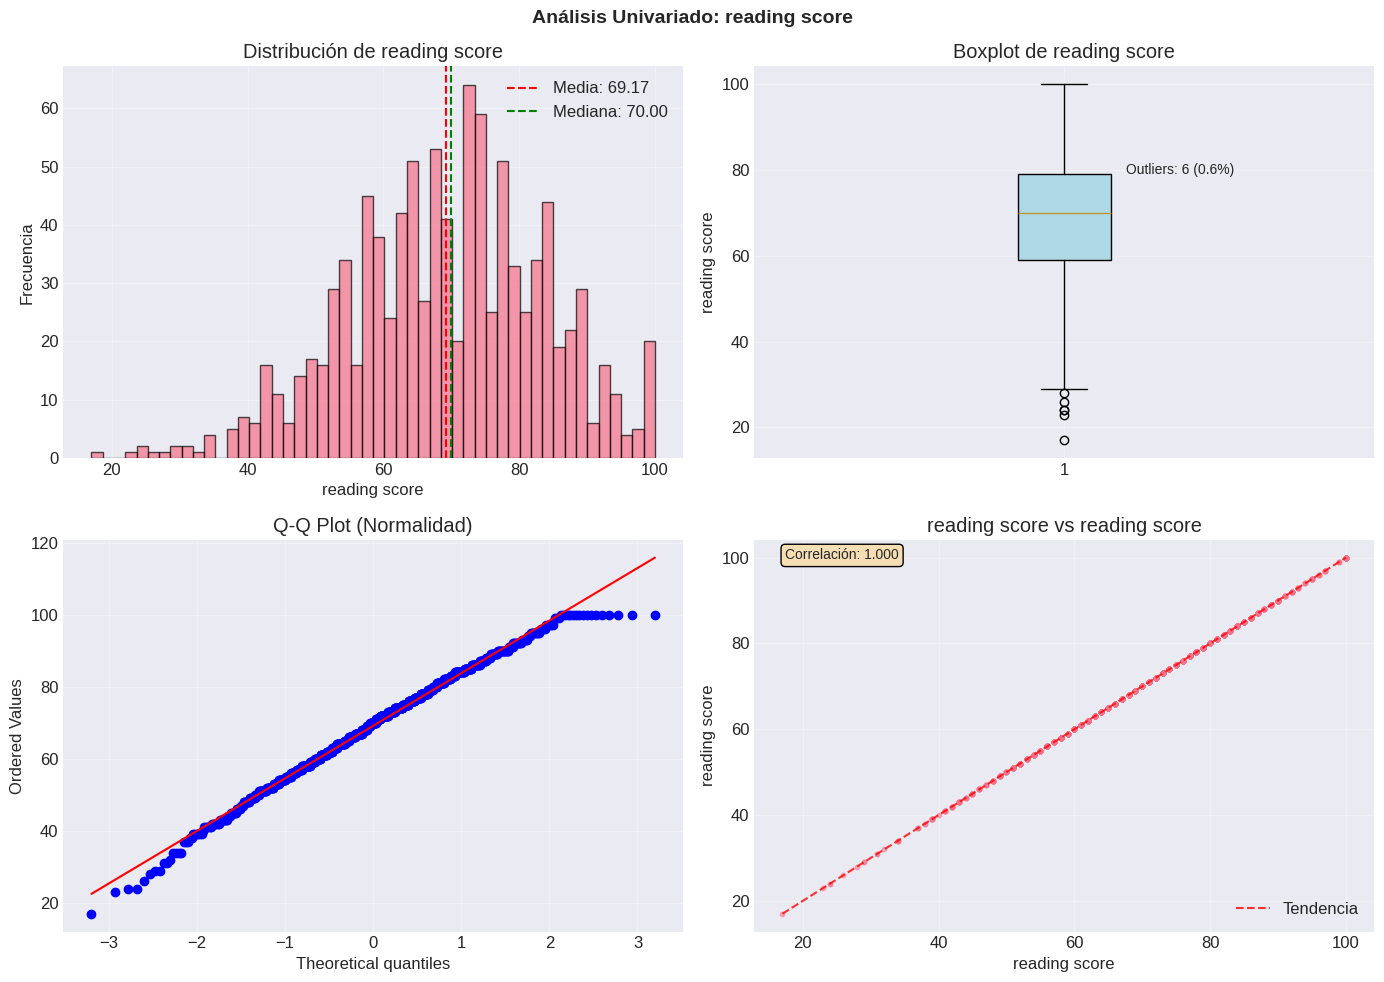

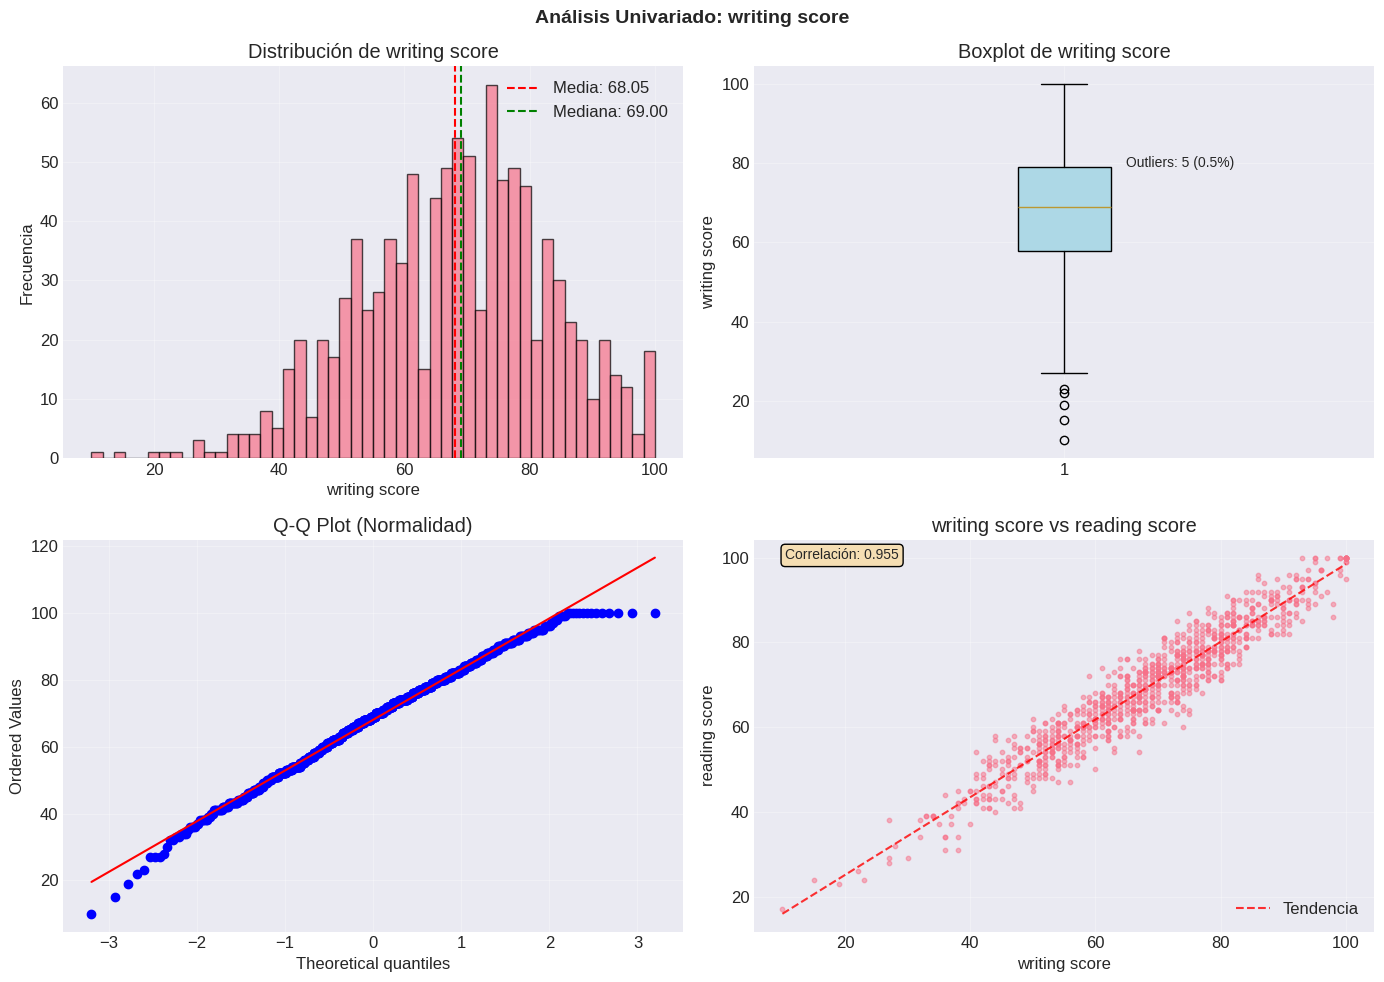

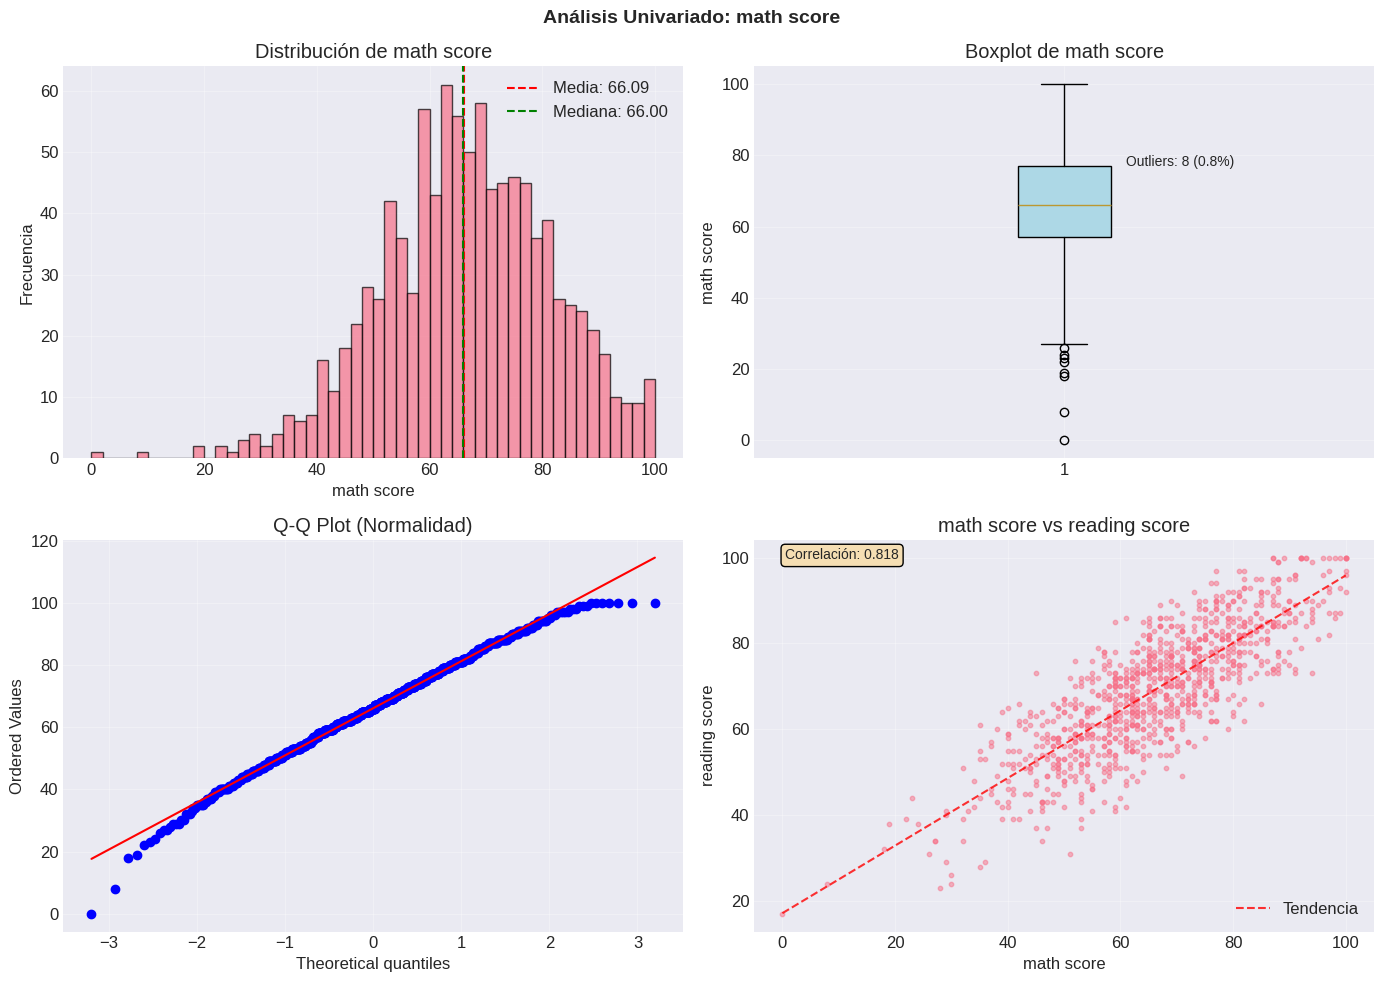

In [7]:
# Función para análisis univariado robusto
def univariate_analysis(df, column, target=None):
    """Análisis univariado con estadísticas robustas"""

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Histograma con KDE
    ax1 = axes[0, 0]
    df[column].hist(bins=50, edgecolor='black', alpha=0.7, ax=ax1)
    ax1.axvline(df[column].mean(), color='red', linestyle='--', label=f'Media: {df[column].mean():.2f}')
    ax1.axvline(df[column].median(), color='green', linestyle='--', label=f'Mediana: {df[column].median():.2f}')
    ax1.set_title(f'Distribución de {column}')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frecuencia')
    ax1.legend()
    ax1.grid(alpha=0.3)

    # 2. Boxplot
    ax2 = axes[0, 1]
    bp = ax2.boxplot(df[column].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax2.set_title(f'Boxplot de {column}')
    ax2.set_ylabel(column)
    ax2.grid(alpha=0.3)

    # Detectar outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    ax2.text(1.1, Q3, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
             fontsize=10)

    # 3. Q-Q Plot
    ax3 = axes[1, 0]
    from scipy import stats
    stats.probplot(df[column].dropna(), dist="norm", plot=ax3)
    ax3.set_title('Q-Q Plot (Normalidad)')
    ax3.grid(alpha=0.3)

    # 4. Relación con target (si existe)
    ax4 = axes[1, 1]
    if target is not None and target in df.columns:
        ax4.scatter(df[column], df[target], alpha=0.5, s=10)
        ax4.set_xlabel(column)
        ax4.set_ylabel(target)
        ax4.set_title(f'{column} vs {target}')

        # Agregar línea de tendencia
        z = np.polyfit(df[column].dropna(), df[target][df[column].notna()], 1)
        p = np.poly1d(z)
        ax4.plot(df[column].sort_values(), p(df[column].sort_values()),
                "r--", alpha=0.8, label=f'Tendencia')

        # Calcular correlación
        corr = df[column].corr(df[target])
        ax4.text(0.05, 0.95, f'Correlación: {corr:.3f}',
                transform=ax4.transAxes, fontsize=10,
                bbox=dict(boxstyle='round', facecolor='wheat'))
        ax4.legend()
    else:
        # Estadísticas adicionales
        ax4.axis('off')
        stats_text = f"""
        Estadísticas Robustas:

        • Media: {df[column].mean():.2f}
        • Mediana: {df[column].median():.2f}
        • Desv. Estándar: {df[column].std():.2f}
        • MAD: {stats.median_abs_deviation(df[column].dropna()):.2f}
        • Asimetría: {df[column].skew():.2f}
        • Curtosis: {df[column].kurtosis():.2f}
        • Rango: [{df[column].min():.2f}, {df[column].max():.2f}]
        • IQR: {IQR:.2f}
        • CV: {df[column].std()/df[column].mean():.2f}
        """
        ax4.text(0.1, 0.5, stats_text, transform=ax4.transAxes,
                fontsize=11, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))

    ax4.grid(alpha=0.3)

    plt.suptitle(f'Análisis Univariado: {column}', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Analizar variables numéricas clave
for col in ['reading score', 'writing score', 'math score']:
    univariate_analysis(df, col, 'reading score')

### ➗ Variables categóricas

### Género vs Resultado en matemáticas



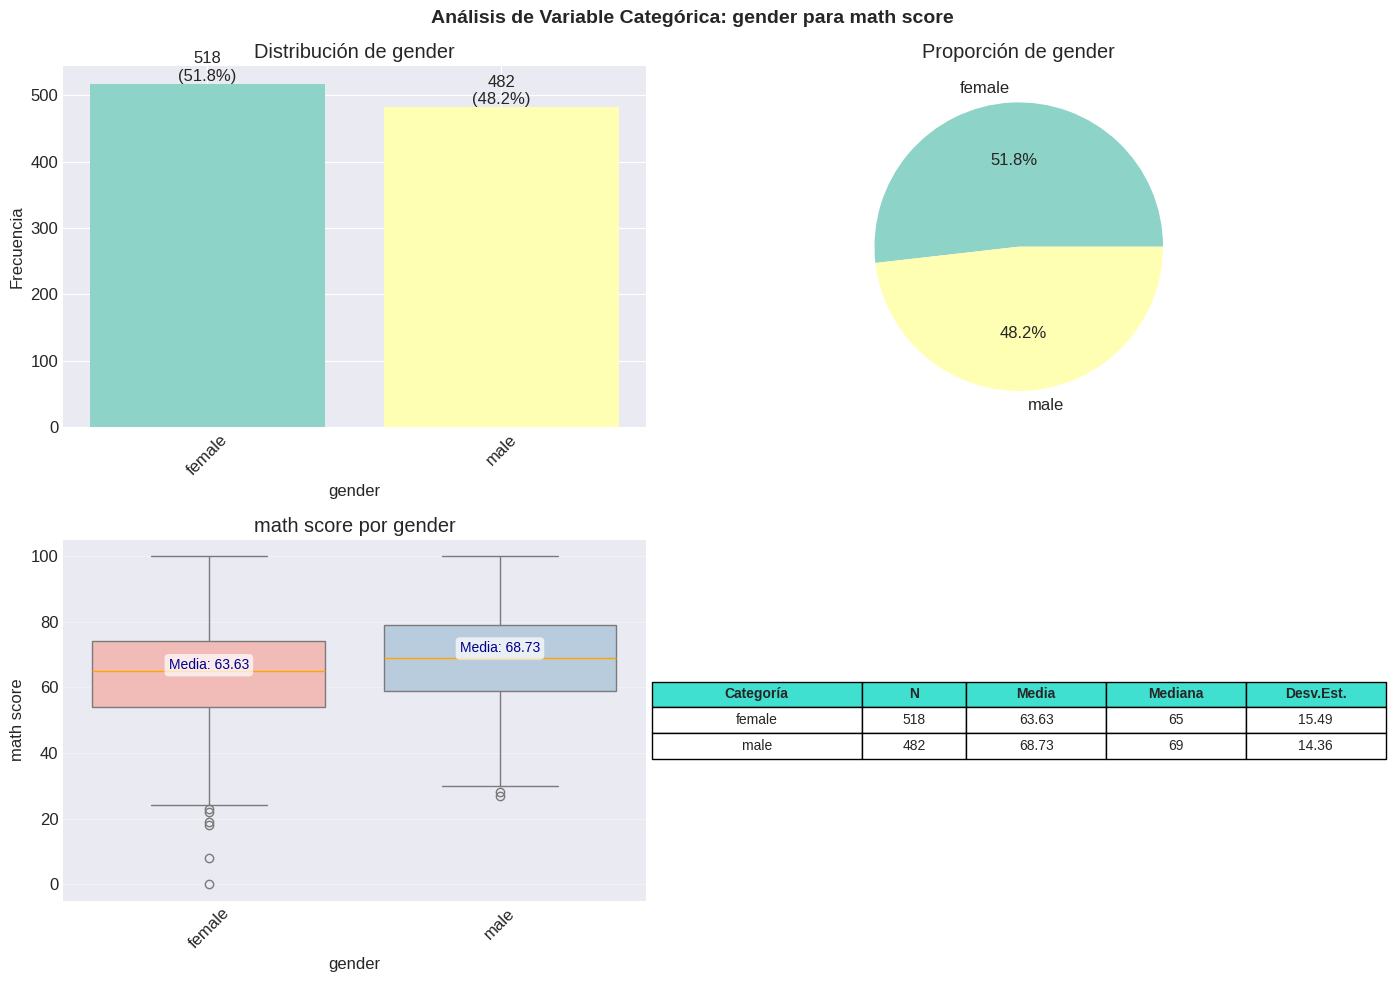

In [8]:
def analyze_categorical(df, cat_col, target_col):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    # Distribución de categorías
    ax1 = axes[0, 0]
    counts = df[cat_col].value_counts()
    ax1.bar(counts.index, counts.values, color=plt.cm.Set3(range(len(counts))))
    ax1.set_title(f'Distribución de {cat_col}')
    ax1.set_xlabel(cat_col)
    ax1.set_ylabel('Frecuencia')
    ax1.tick_params(axis='x', rotation=45)
    # Agregar porcentajes
    for i, (idx, val) in enumerate(counts.items()):
        ax1.text(i, val, f'{val}\n({val/len(df)*100:.1f}%)',
                 ha='center', va='bottom')

    # Pie chart
    ax2 = axes[0, 1]
    ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%',
            colors=plt.cm.Set3(range(len(counts))))
    ax2.set_title(f'Proporción de {cat_col}')

    # Boxplot
    # Boxplot con media anotada y alineación correcta
    ax3 = axes[1, 0]

    # 1. Creamos el Boxplot (Seaborn)
    sns.boxplot(x=df[cat_col], y=df[target_col], ax=ax3,
                palette="Pastel1", medianprops={'color':'orange'})

    # 2. **Paso de Corrección Crucial:** Obtenemos el orden real de las categorías en el eje X del gráfico
    category_order = [t.get_text() for t in ax3.get_xticklabels()]

    # 3. Calculamos las medias una sola vez
    means_series = df.groupby(cat_col)[target_col].mean()

    # 4. Iteramos sobre el ORDEN REAL del gráfico para colocar las etiquetas
    for i, category_name in enumerate(category_order):
        # Usamos .loc[] para obtener la media usando el nombre de la categoría, no el índice numérico
        mean_value = means_series.loc[category_name]

        # Anotación del texto
        ax3.text(i, mean_value + 1, f"Media: {mean_value:.2f}",
                ha='center', va='bottom', fontsize=10, color='darkblue',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='none'))

    ax3.set_title(f'{target_col} por {cat_col}')
    ax3.grid(axis='y', alpha=0.3)
    ax3.tick_params(axis='x', rotation=45)

    # Estadísticas por categoría
    ax4 = axes[1, 1]
    ax4.axis('off')

    stats_by_cat = df.groupby(cat_col)[target_col].agg([
        'count', 'mean', 'median', 'std'
    ]).round(2)

    table_data = []
    for idx, row in stats_by_cat.iterrows():
        table_data.append([idx, f"{row['count']:.0f}",
                          f"{row['mean']:,.2f}",
                          f"{row['median']:,.0f}",
                          f"{row['std']:,.2f}"])

    table = ax4.table(cellText=table_data,
                      colLabels=['Categoría', 'N', 'Media', 'Mediana', 'Desv.Est.'],
                      cellLoc='center',
                      loc='center',
                      colWidths=[0.3, 0.15, 0.2, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)

    # Colorear encabezados
    for i in range(5):
        table[(0, i)].set_facecolor('#40E0D0')
        table[(0, i)].set_text_props(weight='bold')

    plt.suptitle(f'Análisis de Variable Categórica: {cat_col} para {target_col}',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

analyze_categorical(df, 'gender', 'math score')

A pesar de que para ambos géneros hay resultados semejantes, se puede observar que para las mujeres hay peores resultados, incluso con valores outliers muy bajos. Por lo que esta variable si podría ser útil

### Raza/etnia vs Resultado en matemáticas

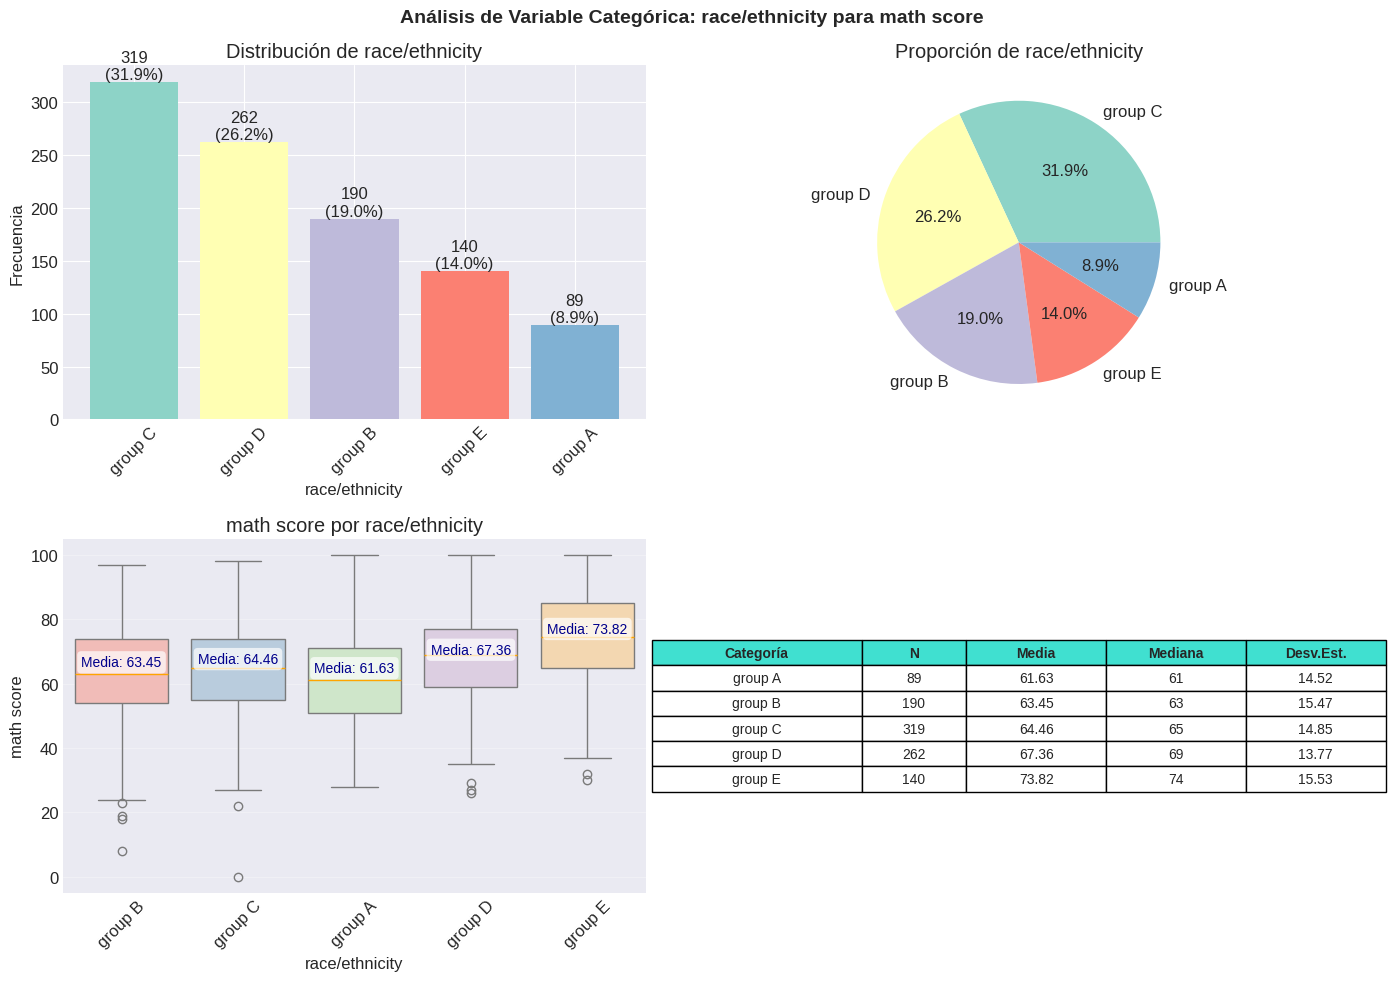

In [9]:
analyze_categorical(df, 'race/ethnicity', 'math score')

Para esta vairable se observa que si hay diferencias notables entre los grupos, lo que significa que es una característica influyente en el resultado obtenido por los estudiantes

### NIvel de educación de los padres vs Resultado en matemáticas

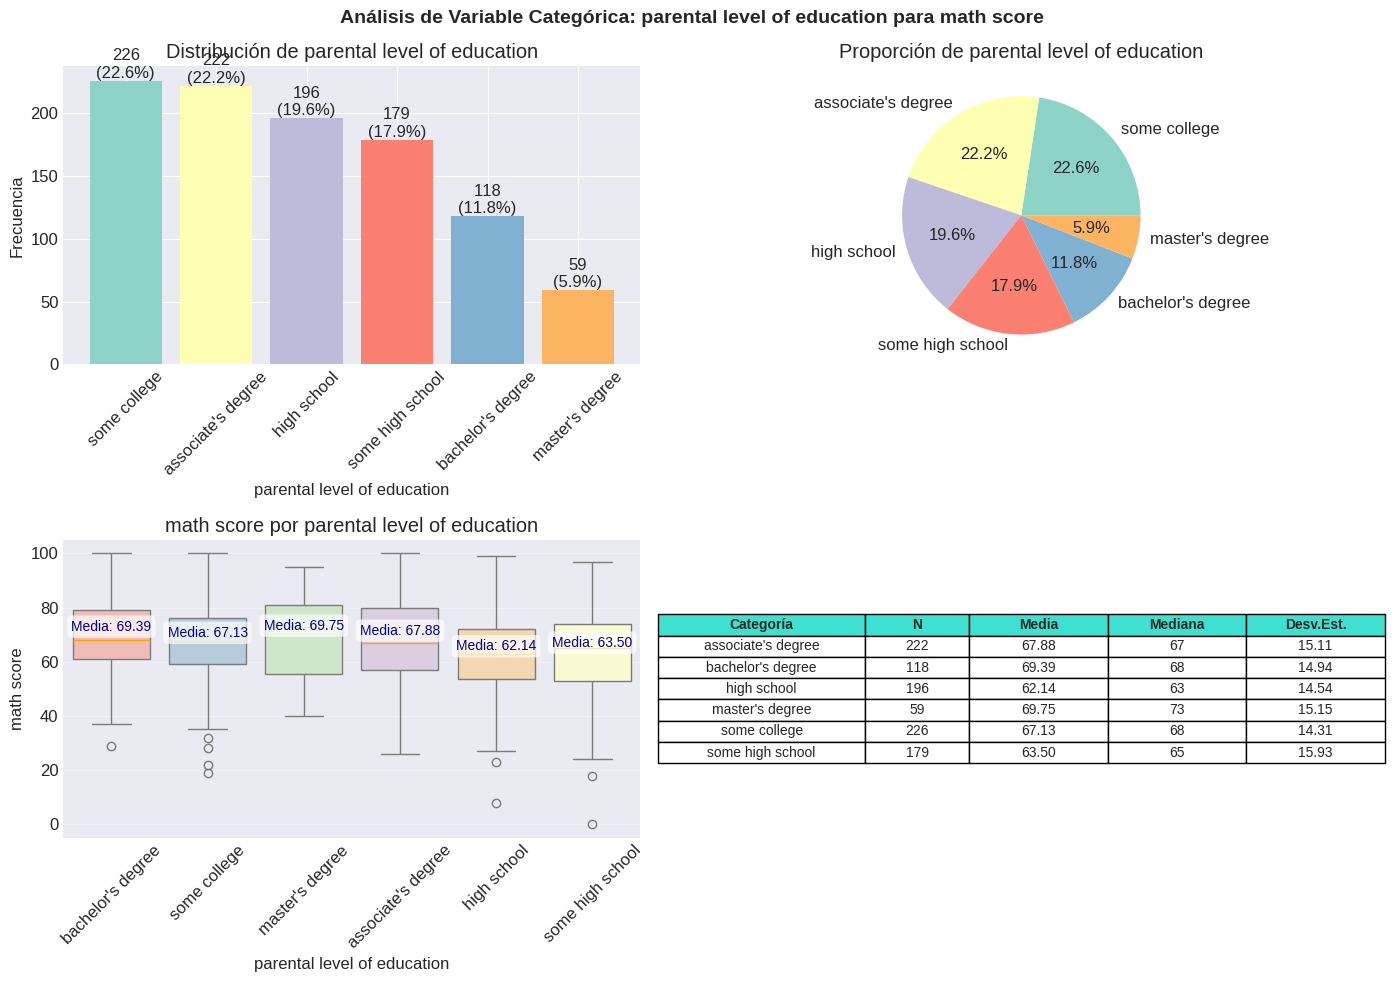

In [10]:
analyze_categorical(df, 'parental level of education', 'math score')

En este caso también se puedne observar diferencias notables entre algunos de los grupos, y en otros no hay demasidada diferencia. Aún así, si se puede concluir que esta características es influyente.

### Almuerzo vs Resultado en matemáticas

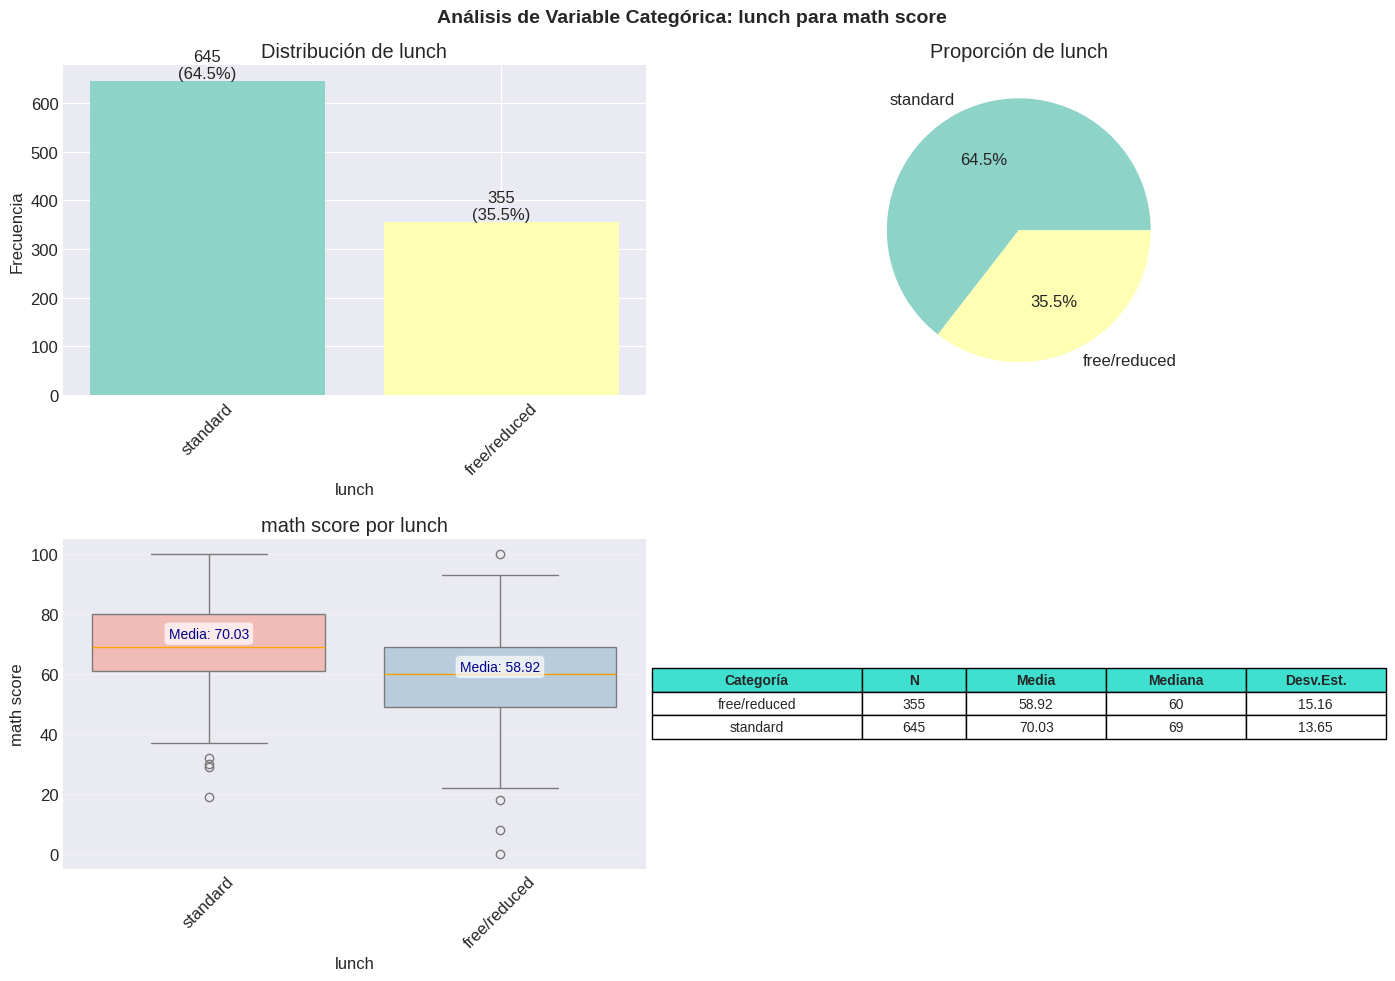

In [11]:
analyze_categorical(df, 'lunch', 'math score')

Hay una amplia diferencia entre los estudiantes con acceso al almuerzo completo y los que no, haciendo de esta característica un valor clave para determinar la posibilidad de reprobar u obtener malas calificación en un estudiante

### Curso de preparación vs Resultado en matemáticas

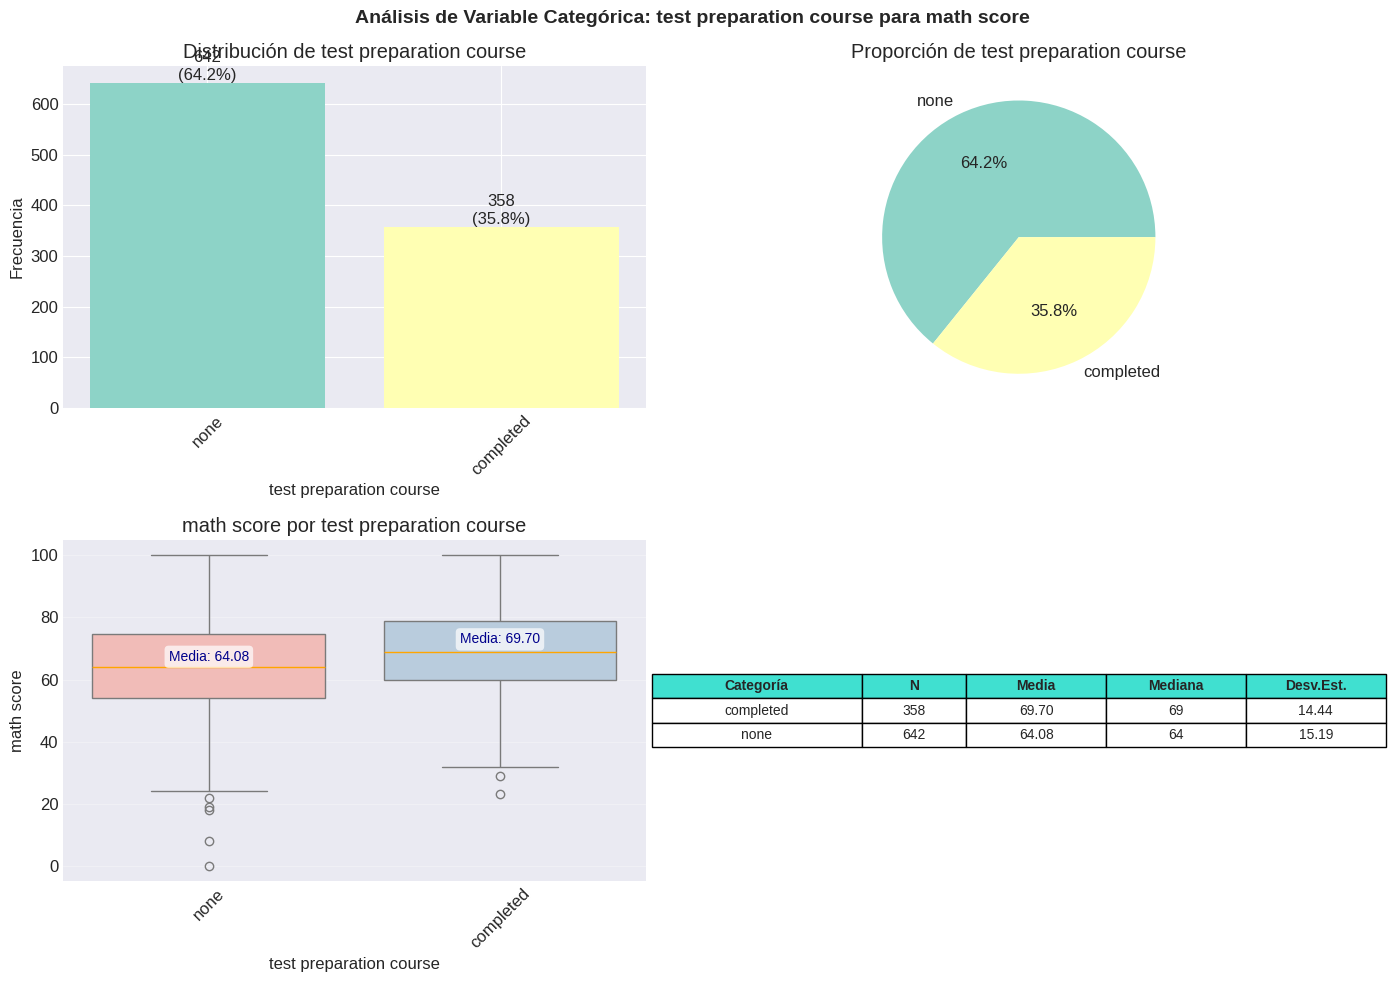

In [12]:
analyze_categorical(df, 'test preparation course', 'math score')

Para esta variable igual que en las demás se observa que los estudiante que completaron el curso tienden a obtener mejores resultados, por lo que también será útil para el modelo

## 📉 Correlación

Con el fin de ilustrar de manera más clara el problema de multicolinealidad entre los resultados de la prueba y porqué solo brindaría confusión al modelo, veremos la amtriz de correlación

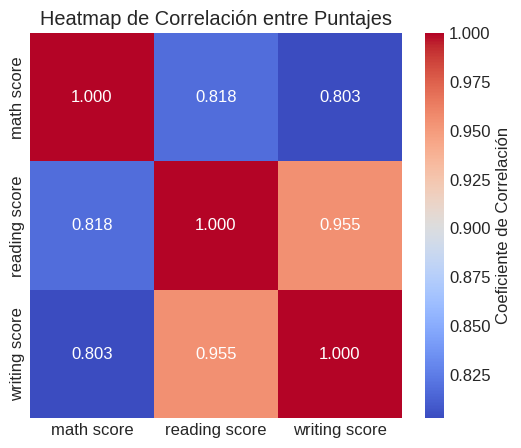

In [13]:
score_cols = ['math score', 'reading score', 'writing score']
corr_matrix = df[score_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".3f", cmap='coolwarm',
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Heatmap de Correlación entre Puntajes')
plt.show()

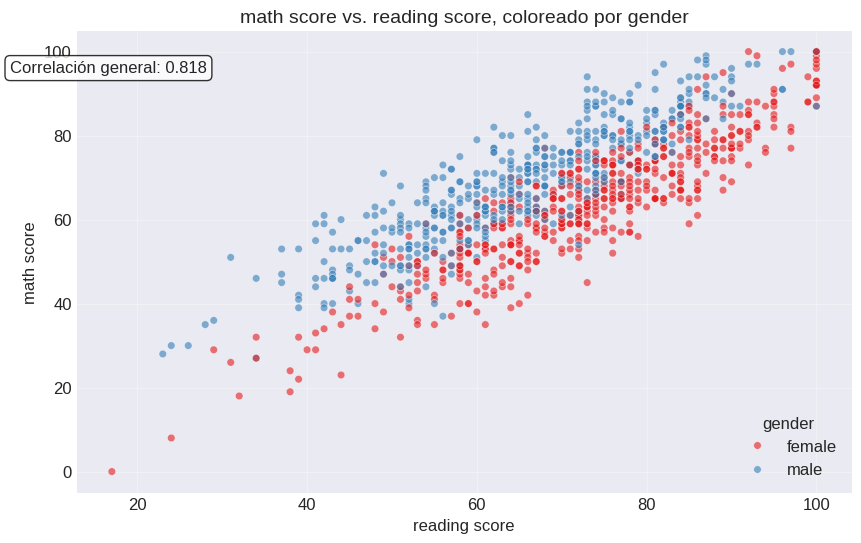

In [14]:
def justify_redundancy(df, target_col, redundant_col, useful_cat_col):
    plt.figure(figsize=(10, 6))

    sns.scatterplot(
        x=df[redundant_col],
        y=df[target_col],
        hue=df[useful_cat_col],
        alpha=0.6,
        s=30,
        palette='Set1'
    )

    plt.title(f'{target_col} vs. {redundant_col}, coloreado por {useful_cat_col}',
              fontsize=14)
    plt.xlabel(redundant_col)
    plt.ylabel(target_col)

    # Comprobación de correlación (general)
    corr = df[target_col].corr(df[redundant_col])

    plt.text(5, 95, f'Correlación general: {corr:.3f}',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.legend(title=useful_cat_col)
    plt.grid(True, alpha=0.3)
    plt.show()

justify_redundancy(df, 'math score', 'reading score', 'gender')

En esta última gráfica se ve que al dividir entre géneros la comparativa del resultado entre matemáticas y lectura, hay un patrón similar em ambos grupos, resultado de la correlación alta que tienen, pero que es redundante y no representativo para el modelo.

En cambio si nos guíaramos por el género, se nota que hay una diefreencia entre los resultados obtenidos.

## 🧺 Baseline

### Dataset Modificado
Como se menciona al principio del Notebook, se agrega al dataset una variable objeto llamada *"pass_math"*, donde su valor será 1 si el estudiante sacó un valor mayor o igual a 60 en la prueba de matemáticas, y 0 si sacó un valor menor.

De esta manera, lo primero que hay que hacer es traer este dataset modificado del repositorio y cargarlo para trabajar el modelo con esos datos.

In [15]:
RAW_URL = "https://raw.githubusercontent.com/JoseCamargo10/machinelearning-project/main/data/modified/StudentsPerformanceModified.csv"

def load_data():
    data_path = Path("datasets")
    data_path.mkdir(parents=True, exist_ok=True)
    csv_path = data_path / "StudentsPerformanceModified.csv"

    # Si existe pero es inválido (p.ej. HTML guardado), forzamos redescarga
    def looks_like_html(p: Path) -> bool:
        try:
            head = p.read_text(encoding="utf-8", errors="ignore")[:200]
            return "<!DOCTYPE html>" in head or "<html" in head.lower()
        except Exception:
            return False

    if csv_path.is_file() and csv_path.stat().st_size > 0 and not looks_like_html(csv_path):
        print("📁 Cargando datos desde caché local…")
        return pd.read_csv(csv_path)
    else:
        print("📥 Descargando dataset…")
        urllib.request.urlretrieve(RAW_URL, csv_path)
        print("✅ Descarga completada")
        return pd.read_csv(csv_path)

dfm = load_data()
print(f"\n📊 Dataset cargado: {dfm.shape[0]:,} filas × {dfm.shape[1]} columnas")

📥 Descargando dataset…
✅ Descarga completada

📊 Dataset cargado: 1,000 filas × 9 columnas


En esta primera entrega no buscamos entrenar un modelo complejo, sino establecer una línea base (baseline) que nos sirva para comparar futuros resultados.

El baseline consiste en entrenar un modelo de clasificación muy simple que intenta predecir si un estudiante aprobará matemáticas (`pass_math = 1`) o no (`pass_math = 0`), usando las variables disponibles tal como están, sin optimización avanzada ni selección especial de características.

En este caso estamos utilizando *DummyClassifier* que es un modelo muy simple que se utiliza como referencia inicial. No intenta aprender patrones reales de los datos, sino que hace predicciones siguiendo reglas triviales, como siempre predecir la clase más frecuente.

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X = pd.get_dummies(dfm.drop(["math_score","pass_math"], axis=1), drop_first=True)
y = dfm["pass_math"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_pred = dummy.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred))
print("Baseline F1:", f1_score(y_test, y_pred))


Baseline Accuracy: 0.65
Baseline F1: 0.7878787878787878


Una vez definido esto, procedemos con el proceso:
1. Preparar los datos
   - Separamos las variables predictoras (X) de la variable objetivo (`pass_math`).  
   - Convertimos las variables categóricas a formato numérico con `pd.get_dummies` para que el modelo pueda procesarlas.

2. Dividir el dataset
   - Dividimos el dataset en dos partes:
      - 80% para entrenar el modelo.
      - 20% para probar sus capacidades.

3. Definir el modelo baseline*
   - Utilizamos un `DummyClassifier` con `strategy="most_frequent"`, que simplemente predice siempre la clase que más aparece en el conjunto de entrenamiento (en este caso, que todos aprueban matemáticas).  

4. Entrenar el modelo

5. Generar predicciones

6. Evaluar el desempeño  
   - Calculamos Accuracy para conocer el porcentaje total de aciertos.  
   - Calculamos F1-score para medir el equilibrio entre precisión y recall en la clase “reprobar”, que es la que más interesa identificar.

7. Analizar resultados
   - Observamos que este modelo básico alcanza una Accuracy de 0.65 y un F1-score de 0.78.  
   - Estos valores se usan como referencia mínima: cualquier modelo que construyamos después debe superar este desempeño para considerarse útil.

Esto significa que, aun siendo un modelo muy simple que solo predice la clase más común, logra acertar en la mayoría de los casos y tiene un desempeño aceptable al identificar a los estudiantes que reprobarían. Sin embargo, su capacidad de predicción es limitada porque no aprovecha patrones reales de los datos. Estos valores sirven como punto de partida: los modelos más avanzados que se construyan después deberán superar este nivel de exactitud y F1-score para ser considerados una mejora real.

___

# 2️⃣ Entrega 2

## 🍳 Preparación de los Datos

#### 🌱 Revisión de los Datos

Verificamos de entrada la estructura, los tipos de datos y la ausencia de valores nulos. Al ejecutar estos comandos, podemos ver que el dataset se encuentra de manera óptima para proceder.

In [17]:
# Ver la estructura general del dataset que ya tiene la variable pass_math, o sea, dfm
print("Tamaño del dataset:", dfm.shape)
print("\nTipos de datos:\n", dfm.dtypes)
print("\n Valores nulos por columna:\n", dfm.isnull().sum())  # El dataset cargado no posee ningún valor nulo que pueda afectar
print()
dfm.head()

Tamaño del dataset: (1000, 9)

Tipos de datos:
 gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
pass_math                       int64
dtype: object

 Valores nulos por columna:
 gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
pass_math                      0
dtype: int64



,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


#### 🔀 Codificación de Variables Categóricas

Aquí procedemos a convertir las variables categóricas en variables numéricas binarias, dado que la mayoría de modelos matemáticos no pueden trabajar directamente con texto o categorías nominales.

Se usa codificación binaria porque es simple, segura y universal para casi todos los modelos. De igual manera, evita errores entre categorías y nos ayuda mucho cuando no hay un orden natural en las variables.

In [19]:
dfm_encoded = pd.get_dummies(dfm, drop_first=True)


print("Tamaño del dataset:", dfm_encoded.shape)
print("\nTipos de datos:\n", dfm_encoded.dtypes)
print("\n Valores nulos por columna:\n", dfm_encoded.isnull().sum())
dfm_encoded.head()

Tamaño del dataset: (1000, 16)

Tipos de datos:
 math_score                                       int64
reading_score                                    int64
writing_score                                    int64
pass_math                                        int64
gender_male                                       bool
race/ethnicity_group B                            bool
race/ethnicity_group C                            bool
race/ethnicity_group D                            bool
race/ethnicity_group E                            bool
parental_level_of_education_bachelor's degree     bool
parental_level_of_education_high school           bool
parental_level_of_education_master's degree       bool
parental_level_of_education_some college          bool
parental_level_of_education_some high school      bool
lunch_standard                                    bool
test_preparation_course_none                      bool
dtype: object

 Valores nulos por columna:
 math_score                 

,math_score,reading_score,writing_score,pass_math,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,72,72,74,1,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,1,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,1,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,0,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,1,True,False,True,False,False,False,False,False,True,False,True,True


#### 🚧 Construcción y Separación de los Datos

Aquí empezamos a separar variables predictorias (X) de variable objetivo (y). En las predictorias eliminamos *math_score* porque con esa se construyó *pass_math*, si estuviera incluida el modelo estaría haciendo trampa. Además, eliminamos *reading_score* y *writing_score* porque no tienen mayor influencia en el puntaje de matemáticas.

In [31]:
X = dfm_encoded.drop(["math_score", "pass_math", "reading_score", "writing_score"], axis=1)
y = dfm_encoded["pass_math"]

print("Dimensiones de X: ", X.shape)
print("Dimensiones de y: ", y.shape)
X.head()
# y no lo imprimimos, pero es un vector con los valores de pass_math

Dimensiones de X:  (1000, 12)
Dimensiones de y:  (1000,)


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_standard,test_preparation_course_none
0,False,True,False,False,False,True,False,False,False,False,True,True
1,False,False,True,False,False,False,False,False,True,False,True,False
2,False,True,False,False,False,False,False,True,False,False,True,True
3,True,False,False,False,False,False,False,False,False,False,False,True
4,True,False,True,False,False,False,False,False,True,False,True,True


#### 🧗 Escalado de Datos

Para árboles o random forest. Aún no he decidido pero llegados al punto de modelado veremos si sí lo incluimos.

In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Dimensiones de X_scaled: ", X_scaled.shape)
X_scaled

Dimensiones de X_scaled:  (1000, 12)


array([[-0.96462528,  2.0647416 , -0.68441857, ..., -0.4669334 ,
         0.74188112,  0.74674788],
       [-0.96462528, -0.4843221 ,  1.46109419, ..., -0.4669334 ,
         0.74188112, -1.33914006],
       [-0.96462528,  2.0647416 , -0.68441857, ..., -0.4669334 ,
         0.74188112,  0.74674788],
       ...,
       [-0.96462528, -0.4843221 ,  1.46109419, ..., -0.4669334 ,
        -1.34792485, -1.33914006],
       [-0.96462528, -0.4843221 , -0.68441857, ..., -0.4669334 ,
         0.74188112, -1.33914006],
       [-0.96462528, -0.4843221 , -0.68441857, ..., -0.4669334 ,
        -1.34792485,  0.74674788]])

#### 💾 Guardado del Dataset Limpio

Finalmente, guardamos el Dataset en caso de llegar a necesitarlo organizado como CSV.

In [35]:
final_df = pd.DataFrame(X, columns=X.columns)
final_df["pass_math"] = y
final_df.to_csv("StudentsPerformance_prepared.csv", index=False)
print("✅ Dataset preparago guardado como StudentsPerformance_prepared.csv")

✅ Dataset preparago guardado como StudentsPerformance_prepared.csv


## 🌀 Modelado

### 🗿 Regresión Logística REVISAR PIPELINE

La regresión logística es un método estadístico para modelar la probabilidad de que ocurra un evento con resultados finitos, como "sí" o "no", basándose en un conjunto de variables predictoras. Se utiliza principalmente en problemas de clasificación y predicción, como la detección de fraude, la predicción de enfermedades o la segmentación de clientes en marketing. A diferencia de la regresión lineal, que predice valores continuos, la regresión logística predice un resultado binario (0 o 1) utilizando una función logística (o sigmoide) para asegurar que la predicción esté entre 0 y 1.

Primero, procedemos a evaluar un modelo de Regresión Logística con validación cruzada estratificada (Stratified K-Fold), para obtener un promedio estable de sus métricas sin usar el test set final todavía. Es nuestra manera de medir el rendimiento honestamente en distintas particiones del dataset, en este caso 5.

Con la ejecución de la prueba podemos entender que:
- El modelo acierta un aproximado del 70% de las veces en la validación con una variación muy pequeña.
- Hay un alto equilibrio entre precisión y recall, buen desempeño en la clase positiva.
- Tiene una capacidad de distinguir clases moderada, por lo que hay margen para mejorar.

In [46]:
X_lr = X.astype(float).copy()
y_lr = y.copy()

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, solver="lbfgs", n_jobs=-1))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # Se divide en 5 partes el dataset, así en cada iteración con 4 entrena y con 1 valida

scores = cross_validate(
    pipe_lr,  # Entrena el pipeline
    X_lr, y_lr,
    cv=cv,  # Evalúa en el fold (partición) de validación
    scoring={"acc": "accuracy", "f1": "f1", "roc": "roc_auc"},
    return_train_score=False
)

# Media de cada métrica y su desviación estándar
print(f"CV Accuracy: {scores['test_acc'].mean():.3f} ± {scores['test_acc'].std():.3f}")
print(f"CV F1:       {scores['test_f1'].mean():.3f} ± {scores['test_f1'].std():.3f}")
print(f"CV ROC-AUC:  {scores['test_roc'].mean():.3f} ± {scores['test_roc'].std():.3f}")

CV Accuracy: 0.704 ± 0.028
CV F1:       0.803 ± 0.021
CV ROC-AUC:  0.711 ± 0.032


Entrenamiento del pipeline.

In [42]:
# 80/20 para evaluación final en test
X_train, X_test, y_train, y_test = train_test_split(
    X_lr, y_lr, test_size=0.20, stratify=y_lr, random_state=42
)

best_pipe = pipe_lr
best_pipe.fit(X_train, y_train)

y_pred = best_pipe.predict(X_test)
y_proba = best_pipe.predict_proba(X_test)[:, 1]  # prob de clase positiva (reprobar)


Una vez ejecutado el pipeline, estos son los resultados sobre los 200 casos de test:
- El modelo acierta el 71% de las veces, muy acertado con la medición del rendimiento.
- Efectivamente como se había hecho en el análisis previo, tiene una capacidad de ordenamiento muy moderada. No está mal, pero está lejos de ser perfecto (~0.69).
- El modelo solo acierta bien en el 43% de los casos que "no reprueban". Tiene muchos que reprueban cuando realmente no lo hacen.
- Encuentra el 89% de los que sí reprueban.

In [51]:
print("Test Accuracy :", accuracy_score(y_test, y_pred))
print("Test F1       :", f1_score(y_test, y_pred))
print("Test ROC-AUC  :", roc_auc_score(y_test, y_proba))
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión\n")
cm_df = pd.DataFrame(cm, index=["Real: No Reprobado", "Real: Reprobado"], columns=["Pred: No Reprobado", "Pred: Reprobado"])
cm_df


Test Accuracy : 0.71
Test F1       : 0.8053691275167785
Test ROC-AUC  : 0.6973789173789173

Classification report:
               precision    recall  f1-score   support

           0      0.595     0.338     0.431        65
           1      0.736     0.889     0.805       135

    accuracy                          0.710       200
   macro avg      0.665     0.614     0.618       200
weighted avg      0.690     0.710     0.684       200


Matriz de Confusión



,Pred: No Reprobado,Pred: Reprobado
Real: No Reprobado,22,43
Real: Reprobado,15,120


**Curva ROC**

~70%, un poco por debajo del nivel aceptable, raspa con la métrica, por lo que puede mejorarse.

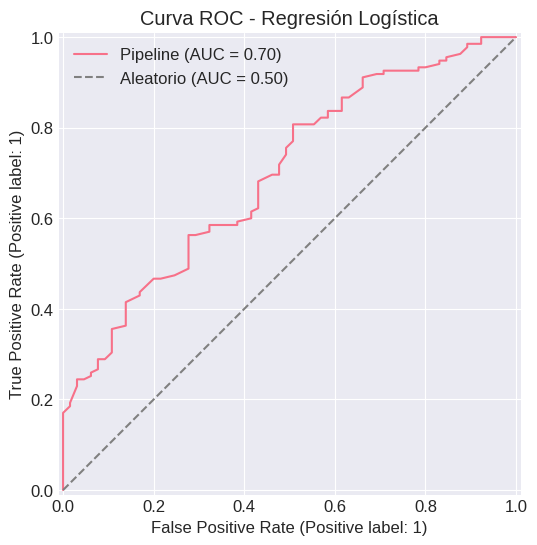

In [60]:
RocCurveDisplay.from_estimator(best_pipe, X_test, y_test)
plt.title("Curva ROC - Regresión Logística")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Aleatorio (AUC = 0.50)")
plt.legend()
plt.show()

Finalmente, pasamos a evaluar el umbral, donde lo moveremos en un rango entre 0.1 y 0.9 para que calcule qué estudiantes aprueban o no, calcule el *accuracy* y el *F1 Score* con ese corte y devuelva los resultados en orden para deducir el mejor umbral posible.
- Entre 0.28 y 0.48 son los rangos donde el modelo logra su mejor *F1 Score* (~0.82).
  - Si se bajara el umbral de 0.28 sería más sensible, por lo que detectaría más reprobados y el número de falsos positivos aumentaría (se pierde precisión).
  - Si se subiera el umbral de 0.48 sería más estricto, por lo que se detectaría a aquellos que están en un riesgo muy alto de reprobar, con la posibilidad de que se escapen varios que de igual manera sigan en riesgo.

In [61]:
def sweep_threshold(y_true, y_score, steps=51):
    ts = np.linspace(0.1, 0.9, steps)
    rows = []
    for t in ts:
        y_hat = (y_score >= t).astype(int)
        rows.append({
            "threshold": t,
            "accuracy": accuracy_score(y_true, y_hat),
            "f1": f1_score(y_true, y_hat),
        })
    return pd.DataFrame(rows)

thr_df = sweep_threshold(y_test, y_proba, steps=41)
thr_df.sort_values("f1", ascending=False).head(15)


,threshold,accuracy,f1
9,0.28,0.70,0.82
12,0.34,0.70,0.82
13,0.36,0.70,0.82
19,0.48,0.72,0.82
10,0.30,0.69,0.81
18,0.46,0.71,0.81
11,0.32,0.69,0.81
8,0.26,0.69,0.81
7,0.24,0.69,0.81
6,0.22,0.69,0.81


### 🏠 K-Nearest Neighbors (KNN) REVISAR

La clasificación basada en vecinos es un tipo de aprendizaje basado en ejemplos. El modelo almacena los ejemplos vistos durante entrenamiento y clasifica un elemento no visto, usando una simple regla de votación por mayoría. Si se ubica un punto en el espacio de características, se le asigna como clase el valor de la clase que tenga la mayor cantidad de ejemplos en la vecindad del punto.

Primero, procedemos a evaluar un modelo de KNN con validación cruzada estratificada (Stratified K-Fold), para obtener un promedio estable de sus métricas sin usar el test set final todavía. Es nuestra manera de medir el rendimiento honestamente teniendo en cuenta el número de vecinos, en este caso probando por primera vez con 5.

Con la ejecución de la prueba podemos entender que:

- El modelo acierta un aproximado del 63% de las veces en la validación con una variación muy pequeña.
- Hay un equilibrio entre precisión y recall, y no lo es tanto como con la Regresión Logística.
- Tiene una capacidad de distinguir clases bastante deficiente.

In [86]:
X_knn = X.astype(float).copy()
y_knn = y.copy()

pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5, weights="uniform"))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # k=5

scores_knn = cross_validate(
    pipe_knn,
    X_knn, y_knn,
    cv=cv,
    scoring={"acc": "accuracy", "f1": "f1", "roc": "roc_auc"},
    return_train_score=False
)

print(f"[KNN] CV Accuracy: {scores_knn['test_acc'].mean():.3f} ± {scores_knn['test_acc'].std():.3f}")
print(f"[KNN] CV F1:       {scores_knn['test_f1'].mean():.3f} ± {scores_knn['test_f1'].std():.3f}")
print(f"[KNN] CV ROC-AUC:  {scores_knn['test_roc'].mean():.3f} ± {scores_knn['test_roc'].std():.3f}")


[KNN] CV Accuracy: 0.664 ± 0.014
[KNN] CV F1:       0.766 ± 0.009
[KNN] CV ROC-AUC:  0.635 ± 0.037


En cualquier caso, hacemos una búsqueda rápida para elegir el *k* que maximiza *F1 Score*, siendo en este caso 7.

In [92]:
param_grid = {
    "model__n_neighbors": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "model__weights": ["uniform", "distance"]
}

grid_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=param_grid,
    scoring="f1",
    cv=cv,
    n_jobs=-1
)

grid_knn.fit(X_knn, y_knn)

print("Mejores hiperparámetros KNN:", grid_knn.best_params_)
print("Mejor F1 (CV):", grid_knn.best_score_.round(3))

best_knn = grid_knn.best_estimator_


Mejores hiperparámetros KNN: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
Mejor F1 (CV): 0.785


Posteriormente hacemos el entrenamiento del pipeline y estos son los resultados sobre los 200 casos de test:

- El modelo acierta el 69% de las veces, un poco más bajo a comparación de Regresión Logística. Con respecto a la primera prueba varía porque se cambia el número de vecinos por el óptimo 7.
- La capacidad de ordenamiento es inferior a la esperada, y está aún más lejos de ser un modelo con esta capacidad (~0.62).
- El modelo solo acierta bien en el 39% de los casos que "no reprueban". Tiene muchos que reprueban cuando realmente no lo hacen.
- Encuentra el 87% de los que sí reprueban.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
    X_knn, y_knn, test_size=0.20, stratify=y_knn, random_state=42
)

best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)

# KNN soporta predict_proba; si no estuviera disponible, usa decision_function (no aplica a KNN)
y_proba = best_knn.predict_proba(X_test)[:, 1]

print("KNN Test Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Test F1      :", f1_score(y_test, y_pred))
print("KNN Test ROC-AUC :", roc_auc_score(y_test, y_proba))

print("\nKNN Classification report:\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm, index=["Real: (No Reprobado)", "Real: (Reprobado)"],
                columns=["Pred: (No Reprobado)", "Pred: (Reprobado)"])


KNN Test Accuracy: 0.69
KNN Test F1      : 0.7919463087248322
KNN Test ROC-AUC : 0.6201139601139601

KNN Classification report:
               precision    recall  f1-score   support

           0      0.541     0.308     0.392        65
           1      0.724     0.874     0.792       135

    accuracy                          0.690       200
   macro avg      0.632     0.591     0.592       200
weighted avg      0.664     0.690     0.662       200



,Pred: (No Reprobado),Pred: (Reprobado)
Real: (No Reprobado),20,45
Real: (Reprobado),17,118


**Curva ROC**

~70%, un poco por debajo del nivel aceptable, raspa con la métrica, por lo que puede mejorarse.

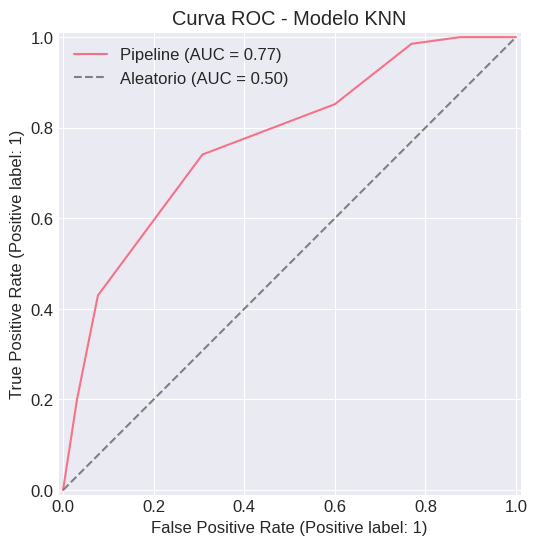

In [93]:
RocCurveDisplay.from_estimator(best_knn, X_test, y_test)
plt.title("Curva ROC - Modelo KNN")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Aleatorio (AUC = 0.50)")
plt.legend()
plt.show()